In [1]:
import sys
sys.path.insert(0, '../../../network')
import logging
import argparse
import numpy as np
from network import Population, RateNetwork
from learning import ReachingTask
from transfer_functions import ErrorFunction
from connectivity import SparseConnectivity, LinearSynapse, ThresholdPlasticityRule, set_connectivity 
from sequences import GaussianSequence
import matplotlib.pyplot as plt
import seaborn as sns
logging.basicConfig(level=logging.INFO)

### Initialization

In [2]:
params = np.load("./ctx_str_params.npz", allow_pickle=True) 
N, sequences, patterns, cp, cw, A = params['N'], params['sequences'], params['patterns'], params['cp'], params['cw'], params['A']

In [3]:
phi = ErrorFunction(mu=0.22, sigma=0.1).phi
plasticity = ThresholdPlasticityRule(x_f=0.5, q_f=0.8)

# populations
ctx = Population(N=N[0], tau=1e-2, phi=phi, name='ctx')
d1 = Population(N=N[1], tau=1e-2, phi=phi, name='d1')
# d2 = Population(N=N[2], tau=1e-2, phi=phi, name='d2')

J = set_connectivity([ctx, d1], cp, cw, A, patterns, plasticity)
# synapse = LinearSynapse(J[0][1].K, 1.5)
# J[0][1].update_sequences(patterns[0][0][1], patterns[1][0][2], synapse.h_EE, plasticity.f, plasticity.g)
# J[0][1].update_sequences(patterns[0][0][0], patterns[1][0][1], synapse.h_EE, plasticity.f, plasticity.g)
network = RateNetwork([ctx, d1], J, formulation=4, disable_pbar=False)

INFO:connectivity:Building connections from ctx to ctx
INFO:connectivity:Building connections from ctx to d1
INFO:connectivity:Building connections from d1 to ctx
INFO:connectivity:Building connections from d1 to d1


### Simulation

In [4]:
init_inputs = [np.zeros(ctx.size),
               np.zeros(d1.size)]
input_patterns = [p[0] for p in patterns]

T=5 #ms
mouse = ReachingTask()
network.simulate_learning(mouse, T, init_inputs, input_patterns, plasticity, 
                          delta_t=40, eta=0.05, tau_e=1500, lamb=0.6, 
                          noise=[0.25,0.13,0.13], e_bl = [0.06,0.03,0.04,0.07], # [0.06,0.016,0.04,0.07]
                          alpha=0, gamma=0, adap=0, env=2.4, etrace=True,  
                          r_ext=[lambda t:0, lambda t: .5], print_output=True, track=False)

INFO:network:Integrating network dynamics
  1%|▏         | 74/4999 [00:02<01:31, 53.56it/s] 

None 0
[-1, -1] 16


  3%|▎         | 148/4999 [00:02<00:37, 128.26it/s]

[-1, 0] 43
[0, 0] 1
[-1, 0] 4
[0, 0] 0
[-1, 0] 0
[0, 0] 14
[-1, 0] 4
null-->aim


  9%|▉         | 448/4999 [00:04<00:19, 234.96it/s]

[0, 0] 273
[0, -1] 1
[0, 1] 3
[-1, 1] 25
[1, 1] 3
[-1, 1] 0


 10%|▉         | 497/4999 [00:04<00:18, 238.00it/s]

aim-->reach


 14%|█▍        | 701/4999 [00:05<00:16, 253.77it/s]

Mouse drank water [1, 1] 204
[1, 1] 250
[1, -1] 4


 15%|█▌        | 757/4999 [00:05<00:16, 263.34it/s]

[-1, -1] 6
[-1, 3] 13
[3, 3] 1
[-1, 3] 3
[2, 3] 3
[-1, 3] 1
[3, 3] 2
[-1, 3] 1
[2, 3] 0
[-1, 3] 2


 16%|█▋        | 813/4999 [00:05<00:15, 267.60it/s]

reach-->scavenge


 24%|██▍       | 1224/4999 [00:07<00:14, 269.18it/s]

[3, 3] 451
[3, -1] 1
[-1, -1] 2
scavenge-->aim
[-1, 0] 28


 31%|███       | 1555/4999 [00:08<00:13, 259.56it/s]

[0, 0] 300
[0, -1] 0
[0, 1] 1
aim-->reach
[-1, 1] 20
[1, 1] 0
[-1, 1] 0
[1, 1] 1
[-1, 1] 0


 36%|███▌      | 1799/4999 [00:09<00:11, 268.25it/s]

Mouse drank water [1, 1] 205
[1, 1] 230
[1, -1] 21


 38%|███▊      | 1880/4999 [00:09<00:11, 268.59it/s]

[-1, -1] 20
[2, -1] 0
[-1, -1] 0
[2, -1] 4
[-1, -1] 2
[3, -1] 14
[3, 3] 2
[3, -1] 0


 39%|███▊      | 1935/4999 [00:09<00:11, 268.53it/s]

reach-->scavenge


 43%|████▎     | 2154/4999 [00:10<00:10, 270.64it/s]

[3, 3] 254
[3, -1] 15
[3, 0] 6
scavenge-->aim
[-1, 0] 16


 49%|████▉     | 2458/4999 [00:11<00:09, 268.27it/s]

[0, 0] 269
[0, -1] 0
[0, 0] 0
[0, -1] 12
[-1, 1] 0
[0, 1] 0
aim-->reach
[-1, 1] 16


 54%|█████▎    | 2677/4999 [00:12<00:08, 261.30it/s]

Mouse drank water [1, 1] 195
[1, 1] 202


 55%|█████▍    | 2731/4999 [00:12<00:08, 253.64it/s]

[1, -1] 38
[-1, -1] 11
reach-->scavenge


 56%|█████▋    | 2815/4999 [00:13<00:08, 265.34it/s]

[3, -1] 69
[3, 3] 2
[3, -1] 0
[3, 3] 24
[3, -1] 1
[3, 3] 1
[3, -1] 0


 58%|█████▊    | 2897/4999 [00:13<00:07, 267.83it/s]

[3, 3] 29


 60%|██████    | 3006/4999 [00:13<00:07, 268.52it/s]

[3, -1] 119
scavenge-->aim
[-1, -1] 11
[0, -1] 10


 62%|██████▏   | 3116/4999 [00:14<00:06, 270.95it/s]

[0, 0] 91
[0, -1] 20
[0, 0] 0
[0, -1] 5
[0, 0] 1


 65%|██████▌   | 3255/4999 [00:14<00:06, 262.83it/s]

[0, -1] 105
[-1, -1] 16
[1, -1] 9
[-1, -1] 5
aim-->lick


 66%|██████▌   | 3309/4999 [00:14<00:06, 263.96it/s]

[2, -1] 22


 68%|██████▊   | 3420/4999 [00:15<00:05, 269.39it/s]

[2, 2] 99


 71%|███████   | 3528/4999 [00:15<00:05, 265.22it/s]

[2, -1] 113
lick-->scavenge
[-1, -1] 10
[3, -1] 1
[-1, -1] 0


 72%|███████▏  | 3582/4999 [00:15<00:05, 264.82it/s]

[3, -1] 46
[3, 3] 9
[3, -1] 9


 73%|███████▎  | 3666/4999 [00:16<00:04, 270.15it/s]

[3, 3] 40
[3, -1] 38
[3, 3] 3


 75%|███████▌  | 3750/4999 [00:16<00:05, 243.66it/s]

[3, -1] 73
scavenge-->aim
[-1, -1] 18
[0, -1] 3


 77%|███████▋  | 3857/4999 [00:17<00:04, 254.48it/s]

[0, 0] 77
[0, -1] 0


 79%|███████▉  | 3941/4999 [00:17<00:03, 266.30it/s]

[0, 0] 77
[0, -1] 0
[0, 0] 17


 81%|████████  | 4025/4999 [00:17<00:03, 270.78it/s]

aim-->reach
[0, -1] 68
[-1, -1] 10
[1, -1] 0


 84%|████████▍ | 4193/4999 [00:18<00:02, 270.71it/s]

[1, 1] 138
[1, -1] 0
[1, 1] 3
[1, -1] 0
[1, 1] 0
Mouse drank water [1, -1] 14


 85%|████████▍ | 4249/4999 [00:18<00:02, 271.07it/s]

[1, -1] 59
reach-->lick
[-1, -1] 14


 89%|████████▉ | 4473/4999 [00:19<00:01, 273.52it/s]

lick-->scavenge
[2, -1] 204
[-1, -1] 2


 93%|█████████▎| 4641/4999 [00:19<00:01, 273.63it/s]

scavenge-->aim
[3, -1] 203
[-1, -1] 11


 98%|█████████▊| 4892/4999 [00:20<00:00, 274.30it/s]

[0, -1] 203
[-1, -1] 1
[0, -1] 0
[-1, -1] 12
[2, -1] 9
[-1, -1] 1
[2, -1] 9
[-1, -1] 3
[1, -1] 2
[-1, -1] 1
[1, -1] 0
[-1, -1] 0


 99%|█████████▉| 4948/4999 [00:21<00:00, 273.92it/s]

[1, -1] 11
aim-->lick
[-1, -1] 11


100%|██████████| 4999/4999 [00:21<00:00, 234.76it/s]


### Results

In [5]:
overlaps_ctx = sequences[0][0].overlaps(network.pops[0])
overlaps_d1 = sequences[1][0].overlaps(network.pops[1])
# overlaps_d2 = sequences[2][0].overlaps(network.pops[2])
filename = 'simulation-test'
np.savez('/work/jp464/striatum-sequence/' + 'test' + '.npz', 
         overlaps_ctx=overlaps_ctx, overlaps_d1=overlaps_d1)

INFO:sequences:Computing overlaps
100%|██████████| 4/4 [00:00<00:00, 143.24it/s]
INFO:sequences:Computing overlaps
100%|██████████| 4/4 [00:00<00:00, 181.39it/s]


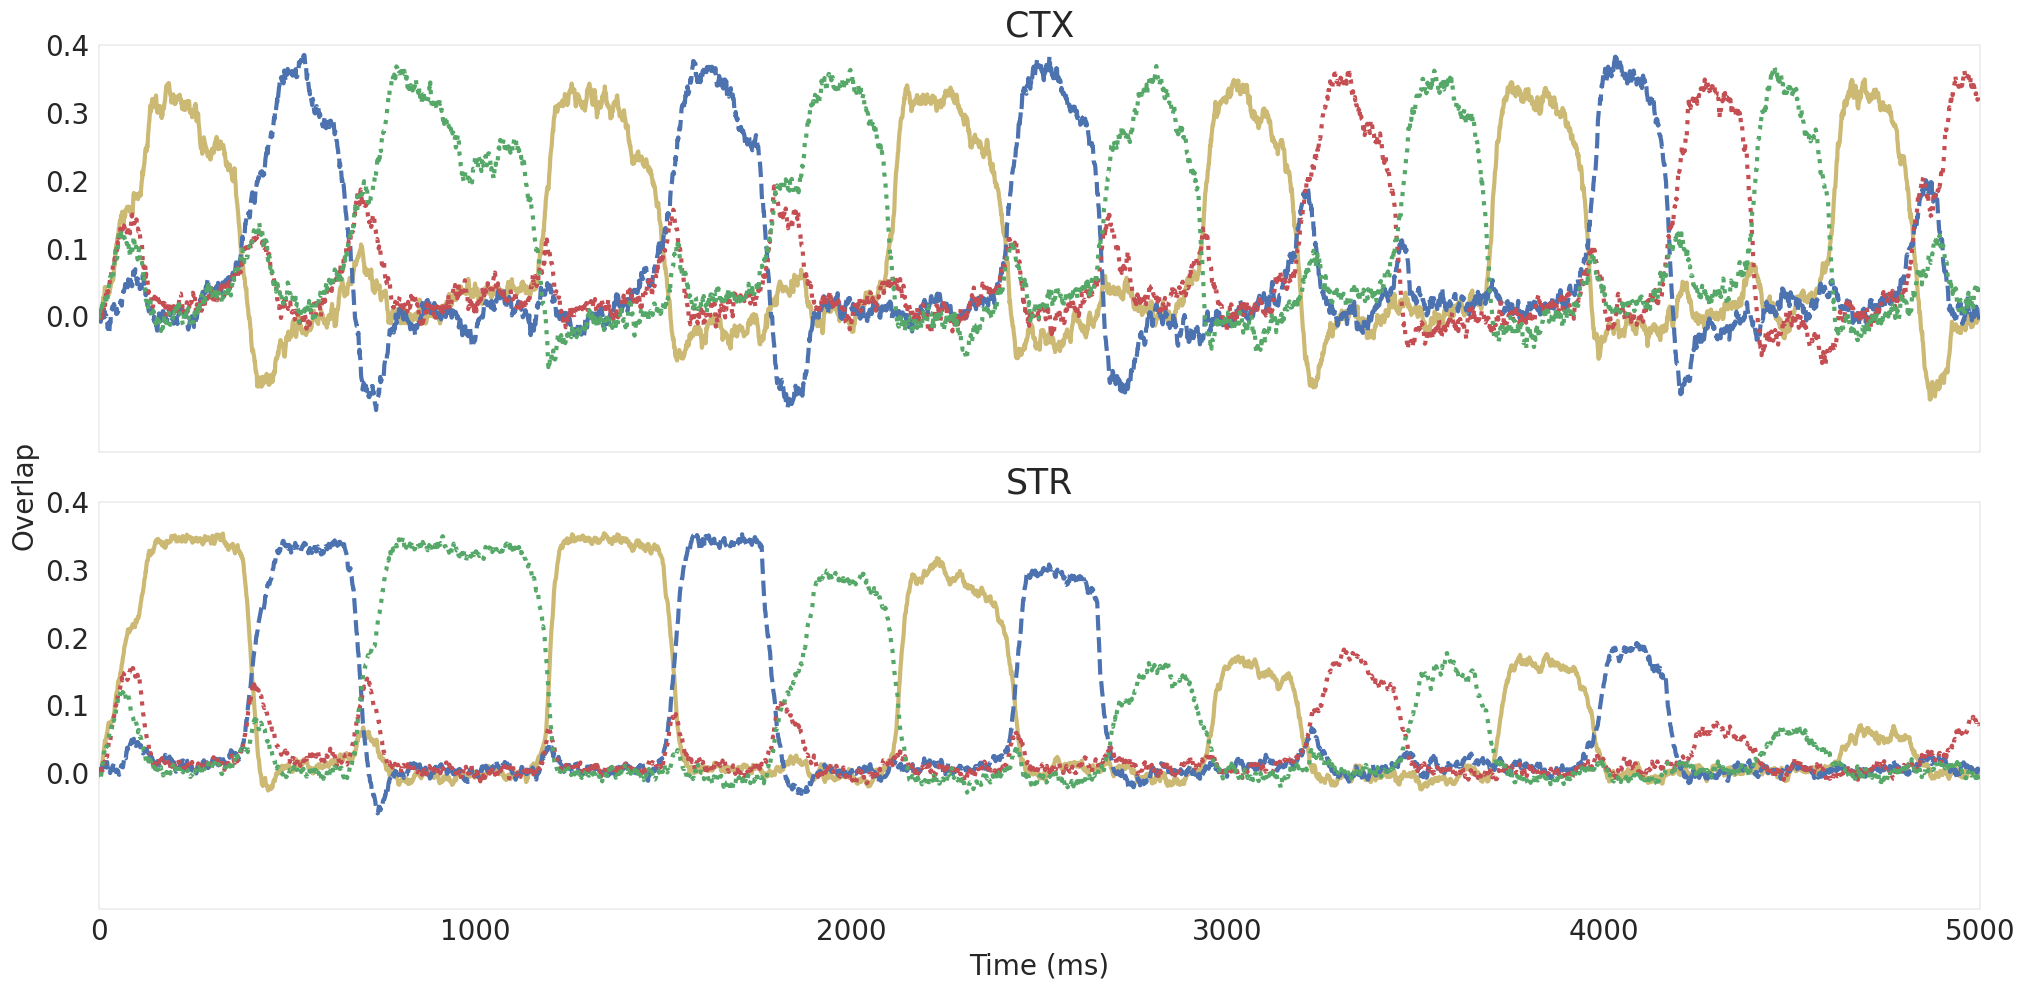

In [6]:
# Set font family globally
sns.set_style('white') 
colors = sns.color_palette('deep')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rcParams['axes.linewidth'] = 0.1

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, tight_layout=True, figsize=(20,10))
axes[0].plot(overlaps_ctx[0], linestyle='solid', linewidth=3, color=colors[8], label='Aim')
axes[0].plot(overlaps_ctx[1], linestyle='dashed', linewidth=3, color=colors[0], label='Reach')
axes[0].plot(overlaps_ctx[2], linestyle='dotted', linewidth=3, color=colors[3], label='Lick')
axes[0].plot(overlaps_ctx[3], linestyle='dotted', linewidth=3, color=colors[2], label='Scavenge')
# axes[0].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[0].set_title("CTX", fontsize=25)
# axes.set_xlabel('Time (ms)', fontsize=20)
axes[1].plot(overlaps_d1[0], linestyle='solid', linewidth=3, color=colors[8])
axes[1].plot(overlaps_d1[1], linestyle='dashed', linewidth=3, color=colors[0])
axes[1].plot(overlaps_d1[2], linestyle='dotted', linewidth=3, color=colors[3])
axes[1].plot(overlaps_d1[3], linestyle='dotted', linewidth=3, color=colors[2])
axes[1].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[1].set_title("STR", fontsize=25)
axes[1].set_xlabel('Time (ms)', fontsize=20)
axes[1].set_xlabel('Time (ms)', fontsize=20)

fig.text(-0.01, 0.5, 'Overlap', va='center', rotation='vertical', fontsize=20)
plt.setp(axes, xlim=(0, 5000))
plt.setp(axes, ylim=(-.2, .4))
# plt.figlegend(fontsize=20, loc='upper right')
# plt.figlegend(labels=['Aim', 'Reach', 'Lick'], fontsize=20)
plt.savefig('/work/jp464/striatum-sequence/output/simulation-online-learning-control.jpg', bbox_inches = "tight", format='jpg')

plt.show()


In [7]:
def temporal_diff(A, B, max_iter):
    sum = 0
    cnt = 0
    for i in range(len(A)):
        if i == 0: continue
        if B[i+1] == None:
            break
        diff = B[i+1][1] - A[i][1]
        sum += (diff)
        cnt += 1
    return sum / cnt

temporal_diff(mouse.behaviors[0], mouse.behaviors[1], 100)

449.0